In [1]:
import pandas as pd
import numpy
import csv
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Internet users (per 100 people)
# Internet users are individuals who have used the Internet (from any location) in the last 12 months. 
# Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.
# International Telecommunication Union, World Telecommunication/ICT Development Report and database, 
# and World Bank estimates.
internet_users = pd.read_csv("FerdiKiziltoprak.csv")

print(internet_users.columns)

Index(['﻿"Country Name"', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')


# Clean and Merge Data

In [2]:
# drop unnecessary columns 
internet_users = internet_users.drop(internet_users.columns[range(1,44)], axis = 1)

In [3]:
internet_users = internet_users.drop(internet_users.columns[range(12,18)], axis = 1)

internet_users.columns = internet_users.columns.str.replace("Country Name", "Country")
print(internet_users[:5])

    ﻿"Country"       2000       2001       2002       2003       2004  \
0        Aruba  15.442823  17.100000  18.800000  20.800000  23.000000   
1      Andorra  10.538836        NaN  11.260469  13.546413  26.837954   
2  Afghanistan        NaN   0.004723   0.004561   0.087891   0.105809   
3       Angola   0.105046   0.136014   0.270377   0.370682   0.464815   
4      Albania   0.114097   0.325798   0.390081   0.971900   2.420388   

        2005       2006       2007   2008   2009  2010  
0  25.400000  28.000000  30.900000  52.00  58.00    62  
1  37.605766  48.936847  70.870000  70.04  78.53    81  
2   1.224148   2.107124   1.900000   1.84   3.55     4  
3   1.143367   1.907648   3.200000   4.60   6.00    10  
4   6.043891   9.609991  15.036115  23.86  41.20    45  


In [4]:
internet_users = internet_users.reset_index(drop=True)
internet_users[:5]

,"﻿""Country""",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,15.442823,17.100000,18.800000,20.800000,23.000000,25.400000,28.000000,30.900000,52.00,58.00,62
1,Andorra,10.538836,NaN,11.260469,13.546413,26.837954,37.605766,48.936847,70.870000,70.04,78.53,81
2,Afghanistan,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.84,3.55,4
3,Angola,0.105046,0.136014,0.270377,0.370682,0.464815,1.143367,1.907648,3.200000,4.60,6.00,10
4,Albania,0.114097,0.325798,0.390081,0.971900,2.420388,6.043891,9.609991,15.036115,23.86,41.20,45


In [5]:
csvfile = open('data.csv', 'w')
fieldnames = ['Country', 'Year','User']
writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
writer.writeheader()

for index,row in internet_users.iterrows():
    counter = 1
    for column in row[1:]:
        writer.writerow({'Country': row[0], 'Year': internet_users.columns[counter] , 'User':column})
        counter = counter + 1



In [6]:
# Out of primary school children
# 
child = pd.read_excel("FerdiKiziltoprak2.xlsx")
print(child.columns)

# Drop 1970-1099 and 2011
child =child.drop(child.columns[range(1,31)], axis = 1)
print(child.columns)

child =child.drop(child.columns[12], axis = 1)
print(child.columns)

Index(['Country', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011'],
      dtype='object')
Index(['Country', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011'],
      dtype='object')
Index(['Country', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010'],
      dtype='object')


In [7]:
# Child values to rows with Country name and Year
csvfile = open('data2.csv', 'w')
fieldnames = ['Country', 'Year','Child']
writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
writer.writeheader()

for index,row in child.iterrows():
    counter = 1
    for column in row[1:]:
        writer.writerow({'Country': row[0], 'Year': child.columns[counter] , 'Child':column})
        counter = counter + 1

In [8]:
data1 = pd.read_csv("data.csv")
data2 = pd.read_csv("data2.csv")


data = pd.merge(left=data1, right=data2)

print(data.head())

  Country  Year       User  Child
0   Aruba  2000  15.442823    107
1   Aruba  2001  17.100000    293
2   Aruba  2002  18.800000    375
3   Aruba  2003  20.800000    528
4   Aruba  2004  23.000000    485


In [9]:
data = data.dropna()
data.reset_index(drop=True)
print(data[data.Country=="Turkey"])

     Country  Year       User   Child
1963  Turkey  2000   3.761685  261160
1964  Turkey  2001   5.189481  222555
1965  Turkey  2002  11.380000  203338
1966  Turkey  2003  12.330000  338385
1967  Turkey  2004  14.580000  274782
1968  Turkey  2005  15.460000  224334
1969  Turkey  2006  18.240000  147519
1970  Turkey  2007  28.630000   83629
1971  Turkey  2008  34.370000   66952
1972  Turkey  2009  36.400000  161880
1973  Turkey  2010  39.820000   68456


In [10]:
data['Year']= pd.to_numeric(data['Year'])
data['User']= pd.to_numeric(data['User'])
data['Child']= pd.to_numeric(data['Child'])

# Visualization

              Year         User            Child
count  1308.000000  1308.000000      1308.000000
mean   2005.065749    22.774408    380581.514526
std       3.162803    24.661318   1500985.106643
min    2000.000000     0.015264         0.000000
25%    2002.000000     3.076205      3630.750000
50%    2005.000000    12.148553     21132.500000
75%    2008.000000    36.000000    123892.250000
max    2010.000000    93.390000  20700241.000000


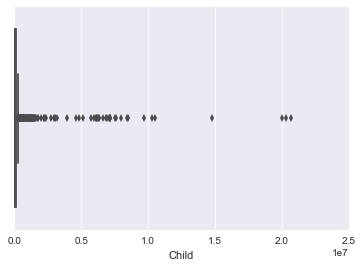

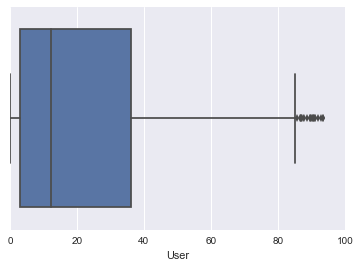

In [11]:
print(data.describe())
seaborn.boxplot(data.Child)
plt.show()

seaborn.boxplot(data.User)
plt.show()

In [12]:
data['ChildGroup']= pd.cut(data.Child, [0,5000,20000,150000,1000000,21000000]) 
data['UserGroup']= pd.cut(data.User, [0,5,15,30,50,100])
print(data.head())

  Country  Year       User  Child ChildGroup UserGroup
0   Aruba  2000  15.442823    107  (0, 5000]  (15, 30]
1   Aruba  2001  17.100000    293  (0, 5000]  (15, 30]
2   Aruba  2002  18.800000    375  (0, 5000]  (15, 30]
3   Aruba  2003  20.800000    528  (0, 5000]  (15, 30]
4   Aruba  2004  23.000000    485  (0, 5000]  (15, 30]


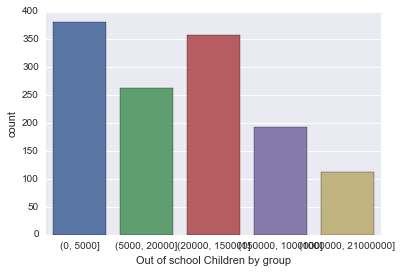

In [13]:
seaborn.countplot(x= 'ChildGroup', data= data)
plt.xlabel('Out of school Children by group')
plt.show()

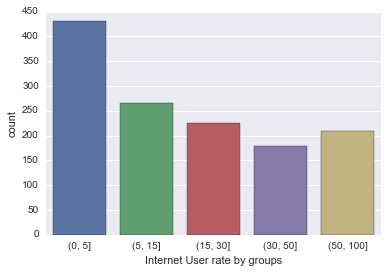

In [14]:
seaborn.countplot(x= 'UserGroup', data= data)
plt.xlabel('Internet User rate by groups')
plt.show()

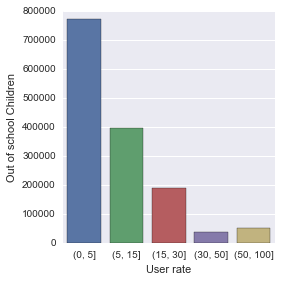

In [15]:
# The hypothesis: if internet usage increase, out of school children decrease. Because of the awareness of the people
# The hypothesis confirmed as graph below
seaborn.factorplot(x= 'UserGroup',y= 'Child',  data= data, kind= "bar", ci=None)
plt.ylabel('Out of school Children')
plt.xlabel('User rate')
plt.show()

In [16]:
# Rename User Goups
def UserRangeGroup (row):
    if row['User'] > 0.0 and row['User']<= 5.0 :
        return 1
    if row['User'] > 5.0 and row['User']<= 15.0 :
        return 2
    if row['User'] > 15.0 and row['User']<= 30.0 :
        return 3
    if row['User'] > 30.0 and row['User']<= 50.0 :
        return 4
    if row['User'] > 50.0 and row['User']<= 100.0 :
        return 5

In [17]:
data['UserCat'] = data.apply (lambda row: UserRangeGroup (row),axis=1)

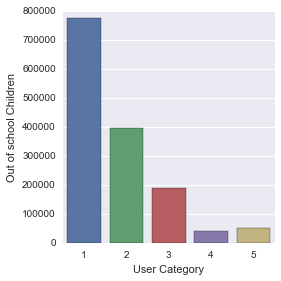

In [18]:
seaborn.factorplot(x= 'UserCat',y= 'Child',  data= data, kind= "bar", ci=None)
plt.ylabel('Out of school Children')
plt.xlabel('User Category')
plt.show()

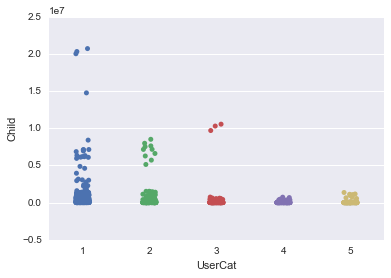

In [19]:
seaborn.stripplot(x="UserCat", y="Child", data=data, jitter=True)

# ANOVA test

In [20]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

In [21]:
data2= data[['UserCat', 'Child']]
data2.head()

,UserCat,Child
0,3,107
1,3,293
2,3,375
3,3,528
4,3,485


In [22]:
model1= smf.ols(formula='Child ~ C(UserCat)', data=data2)

In [23]:
results= model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Child   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     13.64
Date:                Fri, 06 May 2016   Prob (F-statistic):           6.71e-11
Time:                        14:35:21   Log-Likelihood:                -20431.
No. Observations:                1308   AIC:                         4.087e+04
Df Residuals:                    1303   BIC:                         4.090e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        7.737e+05    7.1e+04     

# Post-Hoc Test

In [24]:
mc1 = multi.MultiComparison(data2['Child'], data2['UserCat'])
res1 = mc1.tukeyhsd()
print(res1.summary())

     Multiple Comparison of Means - Tukey HSD,FWER=0.05     
group1 group2   meandiff       lower        upper     reject
------------------------------------------------------------
  1      2    -377616.1343  -691800.6619 -63431.6066   True 
  1      3    -585564.9827  -916577.7306 -254552.2349  True 
  1      4    -734871.4701 -1093427.5714 -376315.3687  True 
  1      5    -722041.1212 -1060725.8916 -383356.3507  True 
  2      3    -207948.8485  -572646.8642 156749.1673  False 
  2      4    -357255.3358  -747124.1358  32613.4643  False 
  2      5    -344424.9869  -716100.3521  27250.3783  False 
  3      4    -149306.4873  -552859.7095 254246.7348  False 
  3      5    -136476.1384  -522481.4479 249529.1711  False 
  4      5     12830.3489   -397039.3103 422700.0081  False 
------------------------------------------------------------
